In [1]:
# Importing dependencies
import csv
import numpy as np
import pandas as pd
from datetime import datetime,date

import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point, Polygon

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Initial exploration of dataset
rat_data = pd.read_csv('resources/Rat_Sightings.csv')

## 1. Initial exploration of dataset

In [3]:
rat_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


In [4]:
# Finding range of dates for all incidents
max_date = rat_data['Created Date'].max()
min_date = rat_data['Created Date'].min()
print(f'Dataset starts from {min_date} to {max_date}')

Dataset starts from 01/01/2010 02:15:27 PM to 12/31/2016 12:00:00 AM


In [5]:
# Determing the number of rows and columns in dataset
row_col = rat_data.shape
print(f'Dataset contains {row_col[0]} rows and {row_col[1]} columns')

Dataset contains 101914 rows and 52 columns


In [6]:
# Determing labels for each column
rat_data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [7]:
rat_data.describe()

,Unique Key,Incident Zip,Facility Type,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude
count,1.019140e+05,101578.000000,0.0,1.012080e+05,101208.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101208.000000,101208.000000
mean,2.815864e+07,10728.680895,NaN,1.002473e+06,208639.988953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739304,-73.934206
std,6.015376e+06,631.206648,NaN,1.958043e+04,29956.193531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082224,0.070617
min,1.146439e+07,83.000000,NaN,9.134950e+05,121350.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499502,-74.254437
25%,2.341452e+07,10086.250000,NaN,9.936100e+05,186934.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679740,-73.966216
50%,2.883680e+07,10472.000000,NaN,1.001398e+06,203425.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725009,-73.938112
75%,3.346014e+07,11222.000000,NaN,1.011951e+06,236364.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.815428,-73.899963
max,3.719700e+07,100354.000000,NaN,1.066922e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.912869,-73.701632


For our analysis we're interested in the following columns:

- "Unique Key": entry for each incident of rodent sighting
- "Created Date": date of each incident
- "Location Type": dwelling where incident occurs
- "'Incident Zip'": zip code of incident
- "'Borough'": borough where incident occurs
- "X Coordinate (State Plane)": x coordinate of state map of each incident
- "Y Coordinate (State Plane)": y coordinate of sate map of each incident
- "Latitude": latitude of each incident
- "Longitude": longitude of each incident

**Also we'll remove all rows with missing or incorrectly formatted values**

## 2. Data cleaning

In [8]:
# Removing time entry of each incident and keeping only the date
rat_data['Created Date'] = pd.to_datetime(rat_data['Created Date']).dt.date

# Removing unecessary columns
rat_data = rat_data.drop(['Closed Date', 
                         'Agency', 
                         'Incident Address', 
                         'Street Name', 
                         'Cross Street 1', 
                         'Cross Street 2', 
                         'Intersection Street 1', 
                         'Intersection Street 2', 
                         'Address Type', 
                         'Landmark', 
                         'Facility Type', 
                         'Status', 
                         'Due Date', 
                         'Resolution Action Updated Date', 
                         'Community Board', 
                         'Park Facility Name', 
                         'Park Borough', 
                         'School Name', 
                         'School Number', 
                         'School Region', 
                         'School Code', 
                         'School Phone Number', 
                         'School Address', 
                         'School City', 
                         'School State', 
                         'School Zip', 
                         'School Not Found', 
                         'School or Citywide Complaint', 
                         'Vehicle Type', 
                         'Taxi Company Borough', 
                         'Taxi Pick Up Location', 
                         'Bridge Highway Name',
                         'Bridge Highway Direction', 
                         'Road Ramp', 
                         'Bridge Highway Segment', 
                         'Garage Lot Name', 
                         'Ferry Direction', 
                         'Ferry Terminal Name',
                         'City', 
                         'Location',
                         'Agency Name'], 
                         axis=1)

# Renaming columns for clarity
rat_data.rename(columns={'Unique Key': 'Incident ID', 
                         'Created Date': 'Sighting Date', 
                         'Descriptor': 'Incident'}, inplace=True)

rat_data.head()

,Incident ID,Sighting Date,Complaint Type,Incident,Location Type,Incident Zip,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,31464015,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,MANHATTAN,980656.0,197137.0,40.707772,-74.012963
1,31464024,2015-09-04,Rodent,Rat Sighting,Commercial Building,10306.0,STATEN ISLAND,955207.0,148858.0,40.575209,-74.104547
2,31464025,2015-09-04,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,STATEN ISLAND,949033.0,169278.0,40.631236,-74.126878
3,31464026,2015-09-04,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,BROOKLYN,1000550.0,197585.0,40.708987,-73.941207
4,31464027,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,BRONX,1021648.0,250489.0,40.854130,-73.864813


In [9]:
# Finding missing values in columns of interest

missing_date = rat_data['Sighting Date'].isna().sum()
missing_zip = rat_data['Incident Zip'].isna().sum()
missing_borough = rat_data['Borough'].isna().sum()
missing_latitude = rat_data['Latitude'].isna().sum()
missing_longitude = rat_data['Longitude'].isna().sum()

print('Missing values from the dataset')
print('-------------------------------')
print(f'Date: {missing_date}')
print(f'Zip: {missing_zip}')
print(f'Borough: {missing_borough}')
print(f'Latitude: {missing_latitude}')
print(f'Longitude: {missing_longitude}')

Missing values from the dataset
-------------------------------
Date: 0
Zip: 336
Borough: 0
Latitude: 706
Longitude: 706


In [10]:
# Since we're interested in location data, we'll drop rows with missing values
clean_rat_data = rat_data.dropna()

In [11]:
# Confirming dropping of rows with missing values
missing_date = clean_rat_data['Sighting Date'].isna().sum()
missing_zip = clean_rat_data['Incident Zip'].isna().sum()
missing_borough = clean_rat_data['Borough'].isna().sum()
missing_latitude = clean_rat_data['Latitude'].isna().sum()
missing_longitude = clean_rat_data['Longitude'].isna().sum()

print('Missing values from the dataset')
print('-------------------------------')
print(f'Date: {missing_date}')
print(f'Zip: {missing_zip}')
print(f'Borough: {missing_borough}')
print(f'Latitude: {missing_latitude}')
print(f'Longitude: {missing_longitude}')

Missing values from the dataset
-------------------------------
Date: 0
Zip: 0
Borough: 0
Latitude: 0
Longitude: 0


In [12]:
# Reformatting borough names
# Reformattiing zip column

clean_rat_data['Borough'] = clean_rat_data['Borough'].str.lower()
clean_rat_data['Borough'] = clean_rat_data['Borough'].str.title()

clean_rat_data['Incident Zip'] = clean_rat_data['Incident Zip'].round(0).astype(int)

clean_rat_data.head()

,Incident ID,Sighting Date,Complaint Type,Incident,Location Type,Incident Zip,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,31464015,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006,Manhattan,980656.0,197137.0,40.707772,-74.012963
1,31464024,2015-09-04,Rodent,Rat Sighting,Commercial Building,10306,Staten Island,955207.0,148858.0,40.575209,-74.104547
2,31464025,2015-09-04,Rodent,Rat Sighting,1-2 Family Dwelling,10310,Staten Island,949033.0,169278.0,40.631236,-74.126878
3,31464026,2015-09-04,Rodent,Rat Sighting,3+ Family Apt. Building,11206,Brooklyn,1000550.0,197585.0,40.708987,-73.941207
4,31464027,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462,Bronx,1021648.0,250489.0,40.854130,-73.864813


In [13]:
clean_rat_data.columns

Index(['Incident ID', 'Sighting Date', 'Complaint Type', 'Incident',
       'Location Type', 'Incident Zip', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Latitude',
       'Longitude'],
      dtype='object')

In [14]:
# Analyzing cleaned dataset
clean_rat_data.describe()

,Incident ID,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,1.011860e+05,101186.000000,1.011860e+05,101186.000000,101186.000000,101186.000000
mean,2.815608e+07,10728.847123,1.002474e+06,208639.833851,40.739304,-73.934202
std,6.013490e+06,564.145932,1.958094e+04,29955.586608,0.082223,0.070619
min,1.146439e+07,83.000000,9.134950e+05,121350.000000,40.499502,-74.254437
25%,2.341553e+07,10128.000000,9.936112e+05,186936.000000,40.679746,-73.966216
50%,2.883344e+07,10472.000000,1.001399e+06,203424.000000,40.724987,-73.938112
75%,3.345403e+07,11222.000000,1.011951e+06,236364.000000,40.815427,-73.899963
max,3.719700e+07,11694.000000,1.066922e+06,271876.000000,40.912869,-73.701632


In [15]:
# We can see that the zip column has one incorrectly formatted entry with a value of 83
# Since we don't know which zip code it refers to, we'll drop those rows
final_rat_data = clean_rat_data[clean_rat_data['Incident Zip'] != 83.0]

# Confirming removal of incorrectly formatted zip code entry
final_rat_data['Incident Zip'].describe()

count    101165.000000
mean      10731.057006
std         542.950742
min       10000.000000
25%       10128.000000
50%       10472.000000
75%       11222.000000
max       11694.000000
Name: Incident Zip, dtype: float64

In [16]:
max_date = final_rat_data['Sighting Date'].max()
min_date = final_rat_data['Sighting Date'].min()

row_col = final_rat_data.shape

# Description of cleaned dataset we'll use for our analysis

print('Cleaned NYC Rat Dataset')
print('-----------------------')
print(f'Table contains {row_col[0]} rows and {row_col[1]} columns')
print(f'Dates range from {min_date} to {max_date}')

Cleaned NYC Rat Dataset
-----------------------
Table contains 101165 rows and 11 columns
Dates range from 2010-01-01 to 2017-09-16


In [17]:
# Saving final csv for analysis
final_rat_data.to_csv(r'clean_csv/final_rat_sightings.csv')

## 3. Data analysis

In [18]:
# Reading data file for visualization and analysis
rats_df = pd.read_csv('clean_csv/final_rat_sightings.csv')
rats_df.head()

,Unnamed: 0,Incident ID,Sighting Date,Complaint Type,Incident,Location Type,Incident Zip,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,0,31464015,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006,Manhattan,980656.0,197137.0,40.707772,-74.012963
1,1,31464024,2015-09-04,Rodent,Rat Sighting,Commercial Building,10306,Staten Island,955207.0,148858.0,40.575209,-74.104547
2,2,31464025,2015-09-04,Rodent,Rat Sighting,1-2 Family Dwelling,10310,Staten Island,949033.0,169278.0,40.631236,-74.126878
3,3,31464026,2015-09-04,Rodent,Rat Sighting,3+ Family Apt. Building,11206,Brooklyn,1000550.0,197585.0,40.708987,-73.941207
4,4,31464027,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462,Bronx,1021648.0,250489.0,40.854130,-73.864813


In [19]:
# Grouping data frame by zip code
rats_zip = rats_df.groupby('Incident Zip').count().reset_index()

In [20]:
# Creating a new dataframe containing the total counts of rat sightings in each zip code
rats_by_zip = rats_zip[['Incident Zip', 'Incident ID']].copy()
rats_by_zip.rename(index=str, columns={
                    "Incident Zip": "Zip Code", 
                    "Incident ID": "Number of Sightings"
                    }, 
                   inplace=True)
rats_by_zip.head()

,Zip Code,Number of Sightings
0,10000,3
1,10001,380
2,10002,1293
3,10003,622
4,10004,40


In [21]:
# Grouping data frame by borough
rats_borough = rats_df.groupby('Borough').count().reset_index()

In [22]:
# Creating a new dataframe containing the total counts of rat sightings in each borough
rats_by_borough = rats_borough[['Borough', 'Incident ID']].copy()
rats_by_borough.rename(index=str, columns={"Incident ID": "Number of Sightings"}, inplace=True)
rats_by_borough.head()

,Borough,Number of Sightings
0,Bronx,20610
1,Brooklyn,34460
2,Manhattan,26462
3,Queens,14741
4,Staten Island,4892


In [23]:
# Opening an reading zip code boundary data with geopandas
nyc = gpd.read_file('resources/nyc_zip_bounderies/nyc_zip_bounderies.shp')
nyc.head()

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,_id,longitude,latitude,geometry
0,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,POLYGON ((-73.86942457284177 40.74915687096788...
1,2,11004,Glen Oaks,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.711608,40.745366,POLYGON ((-73.71068374074009 40.75004039450918...
2,3,11040,New Hyde Park,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.703443,40.748714,POLYGON ((-73.70098278625547 40.73889569923034...
3,4,11426,Bellerose,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.724004,40.736534,POLYGON ((-73.72270447144122 40.75373371438336...
4,5,11365,Fresh Meadows,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.794626,40.739903,"POLYGON ((-73.81088634744756 40.7271718757592,..."


In [24]:
# Rename columns in order to merge with rat_sighting dataframe
nyc.rename(index=str, columns={"postalCode": "Zip Code"}, inplace=True)
nyc.head()

,OBJECTID,Zip Code,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,_id,longitude,latitude,geometry
0,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,POLYGON ((-73.86942457284177 40.74915687096788...
1,2,11004,Glen Oaks,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.711608,40.745366,POLYGON ((-73.71068374074009 40.75004039450918...
2,3,11040,New Hyde Park,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.703443,40.748714,POLYGON ((-73.70098278625547 40.73889569923034...
3,4,11426,Bellerose,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.724004,40.736534,POLYGON ((-73.72270447144122 40.75373371438336...
4,5,11365,Fresh Meadows,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.794626,40.739903,"POLYGON ((-73.81088634744756 40.7271718757592,..."


In [25]:
# Checking dtypes reveals that zip code values in geo dataframe is an object
# Since objects cannot be merged with int we'll convert to int
nyc.dtypes

OBJECTID        int64
Zip Code       object
PO_NAME        object
STATE          object
borough        object
ST_FIPS        object
CTY_FIPS       object
BLDGpostal      int64
_id            object
longitude     float64
latitude      float64
geometry       object
dtype: object

In [26]:
# Converting column values to int
nyc['Zip Code']=nyc['Zip Code'].astype(int)
nyc.dtypes

OBJECTID        int64
Zip Code        int64
PO_NAME        object
STATE          object
borough        object
ST_FIPS        object
CTY_FIPS       object
BLDGpostal      int64
_id            object
longitude     float64
latitude      float64
geometry       object
dtype: object

In [27]:
# Merging dataframes on zip code
merged_zip = pd.merge(nyc, rats_by_zip, on='Zip Code')
merged_zip.head()

,OBJECTID,Zip Code,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,_id,longitude,latitude,geometry,Number of Sightings
0,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,POLYGON ((-73.86942457284177 40.74915687096788...,416
1,2,11004,Glen Oaks,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.711608,40.745366,POLYGON ((-73.71068374074009 40.75004039450918...,24
2,3,11040,New Hyde Park,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.703443,40.748714,POLYGON ((-73.70098278625547 40.73889569923034...,7
3,4,11426,Bellerose,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.724004,40.736534,POLYGON ((-73.72270447144122 40.75373371438336...,97
4,5,11365,Fresh Meadows,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.794626,40.739903,"POLYGON ((-73.81088634744756 40.7271718757592,...",83


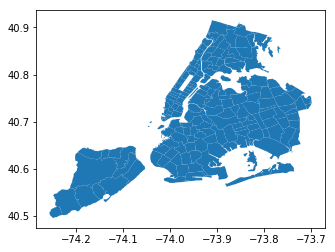

In [28]:
# Confirming that shapefile data is correct
merged_zip.plot()

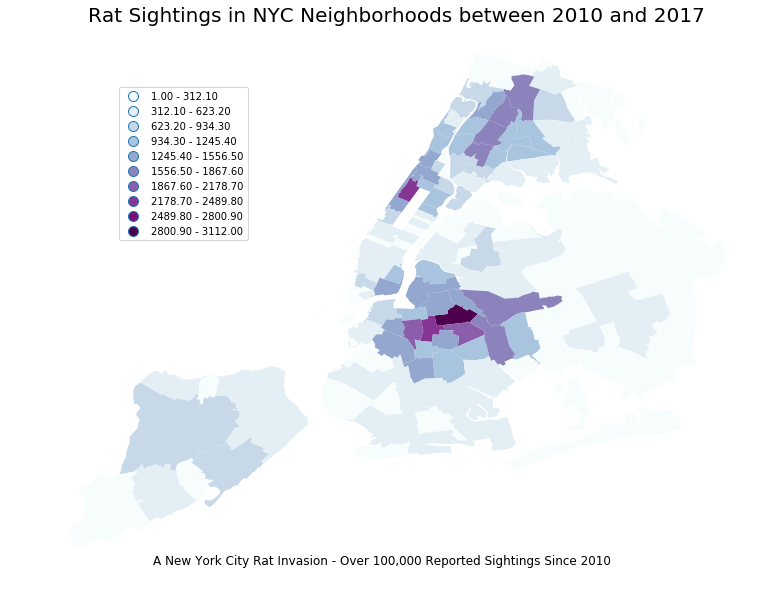

In [73]:
# Setting a variable that will the column we want to visualise on the map
sightings = merged_zip['Number of Sightings']

# Setting a parameters for the graph
colors = 10 # Number of colors to represent the data
cmap = 'BuPu'
figsize = (16, 10)
title = 'Rat Sightings in NYC Neighborhoods between 2010 and 2017'
imgfile = 'Figures/nyc_rats_sightings.png'
annotation = 'A New York City Rat Invasion - Over 100,000 Reported Sightings Since 2010'
ax = merged_zip.plot(column=sightings, cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)

ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(annotation, xy=(0.2, 0.08), size=12, xycoords='figure fraction')

ax.set_axis_off()
#ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend().set_bbox_to_anchor((.3, .9))
#ax.get_figure()

plt.savefig(imgfile)

In [30]:
# Plotting the graph by borough
# Opening and reading borough boundary data with geopandas
borough = gpd.read_file('resources/Borough Boundaries/geo_export_ca011477-3aac-41b1-9a85-e2efd0b0a5ac.shp')
borough.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2.0,Bronx,1.186612e+09,462958.186921,(POLYGON ((-73.89680883223774 40.7958084451597...
1,5.0,Staten Island,1.623921e+09,330432.867999,(POLYGON ((-74.05050806403247 40.5664220341608...
2,4.0,Queens,3.044779e+09,895169.617616,(POLYGON ((-73.83668274106707 40.5949466970158...
3,1.0,Manhattan,6.365940e+08,360282.142897,(POLYGON ((-74.01092841268031 40.6844914725429...
4,3.0,Brooklyn,1.937597e+09,739911.533210,(POLYGON ((-73.86706149472118 40.5820879767934...


In [31]:
# Rename columns in order to merge with rat_sighting dataframe
borough.rename(index=str, columns={"boro_name": "Borough"}, inplace=True)
borough.head()

,boro_code,Borough,shape_area,shape_leng,geometry
0,2.0,Bronx,1.186612e+09,462958.186921,(POLYGON ((-73.89680883223774 40.7958084451597...
1,5.0,Staten Island,1.623921e+09,330432.867999,(POLYGON ((-74.05050806403247 40.5664220341608...
2,4.0,Queens,3.044779e+09,895169.617616,(POLYGON ((-73.83668274106707 40.5949466970158...
3,1.0,Manhattan,6.365940e+08,360282.142897,(POLYGON ((-74.01092841268031 40.6844914725429...
4,3.0,Brooklyn,1.937597e+09,739911.533210,(POLYGON ((-73.86706149472118 40.5820879767934...


In [32]:
merged_boro = pd.merge(borough, rats_by_borough, on='Borough')
merged_boro.head()

,boro_code,Borough,shape_area,shape_leng,geometry,Number of Sightings
0,2.0,Bronx,1.186612e+09,462958.186921,(POLYGON ((-73.89680883223774 40.7958084451597...,20610
1,5.0,Staten Island,1.623921e+09,330432.867999,(POLYGON ((-74.05050806403247 40.5664220341608...,4892
2,4.0,Queens,3.044779e+09,895169.617616,(POLYGON ((-73.83668274106707 40.5949466970158...,14741
3,1.0,Manhattan,6.365940e+08,360282.142897,(POLYGON ((-74.01092841268031 40.6844914725429...,26462
4,3.0,Brooklyn,1.937597e+09,739911.533210,(POLYGON ((-73.86706149472118 40.5820879767934...,34460


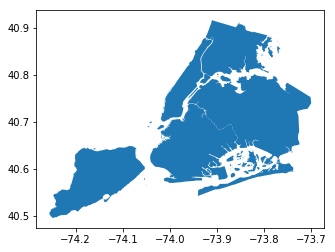

In [33]:
# Confirming that shapefile data is correct
merged_boro.plot()

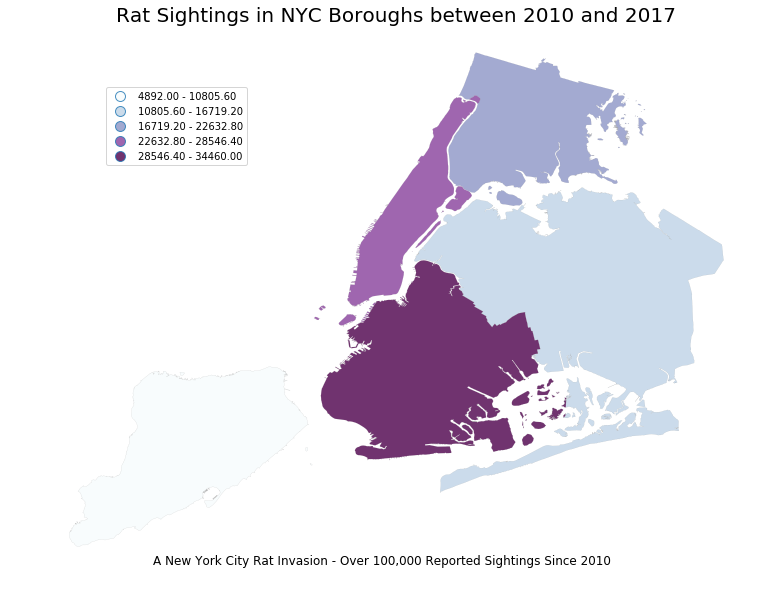

In [76]:
# Setting a variable that will the column we want to visualise on the map
sightings_boro = merged_boro['Number of Sightings']

# Setting a parameters for the graph
colors = 5 # Number of colors to represent the data
cmap = 'BuPu'
figsize = (16, 10)
title = 'Rat Sightings in NYC Boroughs between 2010 and 2017'
imgfile = 'Figures/nyc_rats_sightings_by_boro.png'
annotation = 'A New York City Rat Invasion - Over 100,000 Reported Sightings Since 2010'
ax = merged_boro.plot(column=sightings_boro, cmap=cmap, edgecolor='grey', 
                      linewidth=0.10, alpha=0.8, figsize=figsize, scheme='equal_interval', k=colors, legend=True)

ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(annotation, xy=(0.2, 0.08), size=12, xycoords='figure fraction')

ax.set_axis_off()
#ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend().set_bbox_to_anchor((.3, .9))
#ax.get_figure()

plt.savefig(imgfile)

In [57]:
# Summary Analysis
total = rats_by_zip['Number of Sightings'].sum()
max_rats = rats_by_zip['Number of Sightings'].max()
min_rats = rats_by_zip['Number of Sightings'].min()

# Highest number of rats in zip code and borough
max_rats = rats_by_zip.loc[rats_by_zip['Number of Sightings'] == max_rats]
zip_max = max_rats.iloc[0]['Zip Code']
total_max = max_rats.iloc[0]['Number of Sightings']
neighboorhood_max = nyc.loc[nyc['Zip Code'] == zip_max]
max_borough = neighboorhood_max.iloc[0]['borough']

borough_max = rats_by_borough['Number of Sightings'].max()
dirty_borough_results = rats_by_borough.loc[rats_by_borough['Number of Sightings'] == borough_max]
dirty_borough = dirty_borough_results.iloc[0]['Borough']

# Cleanest borough
borough_min = rats_by_borough['Number of Sightings'].min()
clean_borough_results = rats_by_borough.loc[rats_by_borough['Number of Sightings'] == borough_min]
cleanest_boro = clean_borough_results.iloc[0]['Borough']

print('--------------------------------------------------------------------------------------------------')
print(f'Between {min_date} and {max_date} there have been a total of {total} rat sightings in NYC boroughs.')
print(f'The highest number of rats was observed in zip code {zip_max} in {max_borough}, with a total of {total_max} sightings.')
print(f'{dirty_borough} had the highest number of sightings overall, with a total of {total_max} sightings.')
print(f'The cleanest borough was {cleanest_boro} with {borough_min} rat sightings.')
print('--------------------------------------------------------------------------------------------------')


--------------------------------------------------------------------------------------------------
Between 2010-01-01 and 2017-09-16 there have been a total of 101165 rat sightings in NYC boroughs.
The highest number of rats was observed in zip code 11221 in Brooklyn, with a total of 3112 sightings.
Brooklyn had the highest number of sightings overall, with a total of 3112 sightings.
The cleanest borough was Staten Island with 4892 rat sightings.
--------------------------------------------------------------------------------------------------
